In [18]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('all-data.csv',delimiter=',',encoding='latin-1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [20]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Message'})

In [21]:
df.shape

(4845, 2)

In [22]:
df.index = range(4845)
df['Message'].apply(lambda x: len(x.split(' '))).sum()

111964

In [23]:
cnt_pro = df['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 864x288 with 0 Axes>

In [24]:
sentiment  = {'positive': 0,'neutral': 1,'negative':2} 

df.sentiment = [sentiment[item] for item in df.sentiment] 
print(df)

      sentiment                                            Message
0             1  Technopolis plans to develop in stages an area...
1             2  The international electronic industry company ...
2             0  With the new production plant the company woul...
3             0  According to the company 's updated strategy f...
4             0  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...         ...                                                ...
4840          2  LONDON MarketWatch -- Share prices ended lower...
4841          1  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842          2  Operating profit fell to EUR 35.4 mn from EUR ...
4843          2  Net sales of the Paper segment decreased to EU...
4844          2  Sales in Finland decreased by 10.5 % in Januar...

[4845 rows x 2 columns]


In [25]:
def print_message(index):
    example = df[df.index == index][['Message', 'sentiment']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Message:', example[1])
print_message(12)

Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .
Message: 0


In [26]:
print_message(0)

Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Message: 1


In [27]:
from nltk.corpus import stopwords

In [98]:
!pip3 install lxml
!pip3 install bs4
!pip install html5lib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from bs4 import BeautifulSoup
import requests
# # python -c import requests
# r = requests.get("https://www.allrecipes.com/recipes/96/salad/")
def cleanText(text):
#     text = BeautifulSoup(text,  "html.parser")
#     text = BeautifulSoup(html, "html5lib")
#     text = BeautifulSoup(html, features="xml")

    text= BeautifulSoup(text, 'html.parser').text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['Message'] = df['Message'].apply(cleanText)


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [103]:
df['Message'] = df['Message'].apply(cleanText)
train, test = train_test_split(df, test_size=0.2 , random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Message']), tags=[r.sentiment]), axis=1)

max_fatures = 500000

MAX_SEQUENCE_LENGTH = 50

tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Message'].values)
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


Found 4845 unique tokens.


In [104]:
X = tokenizer.texts_to_sequences(df['Message'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4845, 50)


In [105]:
train_tagged.values

array([TaggedDocument(words=['eqt', 'has', 'completed', 'its', 'eit', 'from', 'salcomp', ',', 'a', 'finnish', 'company', 'that', 'makes', 'mobile', 'phone', 'chargers', ',', 'by', 'selling', 'its', 'remaining', 'stake', 'to', 'swedish', 'investment', 'group', 'nordstjernan', 'for', 'about', '(', 'euro', ')', '35', 'million', '(', '$', '47', 'million', ')', '.'], tags=[1]),
       TaggedDocument(words=['in', 'september', '2010', ',', 'the', 'finnish', 'group', 'agreed', 'to', 'buy', 'danish', 'company', 'rose', 'poultry', 'a-s', 'for', 'up', 'to', 'eur23', '.9', 'm', 'in', 'a', 'combination', 'of', 'cash', 'and', 'stock', '.'], tags=[0]),
       TaggedDocument(words=['the', 'current', 'reference', 'grade', 'instruments', 'are', 'challenging', 'to', 'operate', 'due', 'to', 'their', 'high', 'price', 'and', 'compleity', 'for', 'routine', 'use', '.'], tags=[2]),
       ...,
       TaggedDocument(words=['proha', 'plc', '(', 'euronet', ':7327', ')', 'announced', 'today', '(', '19', 'may', ')'

In [106]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 3876/3876 [00:00<?, ?it/s]


In [107]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|████████████████████████████████████████████████████████████████████████████████████████| 3876/3876 [00:00<00:00, 239445.06it/s]


CPU times: total: 5.23 s
Wall time: 5.43 s


In [115]:
print(d2v_model)


Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [116]:
len(d2v_model.wv.key_to_index)

10298

In [117]:
embedding_matrix = np.zeros((len(d2v_model.wv.key_to_index)+ 1, 20))

for i, vec in enumerate(d2v_model.dv.vectors):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
          embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

In [118]:
d2v_model.wv.most_similar(positive=['profit'], topn=10)


[('loss', 0.847663938999176),
 ('109mn', 0.7388504147529602),
 ('larger-than-epected', 0.7343407273292542),
 ('income', 0.7334662079811096),
 ('piloting', 0.7216582298278809),
 ('cth1v', 0.7032105326652527),
 ('attempt', 0.6965788006782532),
 ('martinez', 0.6809771060943604),
 ('valmet', 0.6802006959915161),
 ('presented', 0.6724990010261536)]

In [119]:
d2v_model.wv.most_similar(positive=['investment'], topn=10)


[('organization', 0.6963616013526917),
 ('fair', 0.6779007911682129),
 ('paints', 0.6738169193267822),
 ('27,060', 0.6626840829849243),
 ('lasse', 0.6522627472877502),
 ('advise', 0.6470981240272522),
 ('grievance', 0.6469753980636597),
 ('pioneer', 0.6421980857849121),
 ('95.3', 0.630027711391449),
 ('45mn', 0.6262086033821106)]

In [120]:
d2v_model.wv.most_similar(positive=['broke'], topn=10)


[('mold', 0.9693555235862732),
 ('wrote', 0.8739222884178162),
 ('kelly', 0.8701401948928833),
 ('brockpahler', 0.8594234585762024),
 ('kivimeister', 0.8543840050697327),
 ('aptly', 0.8451061844825745),
 ('aboavista', 0.835945725440979),
 ('i', 0.8330953121185303),
 ('remarked', 0.8227435946464539),
 ('macro-economic', 0.8204361796379089)]

In [121]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in d2v_model.wv.key_to_index:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
 

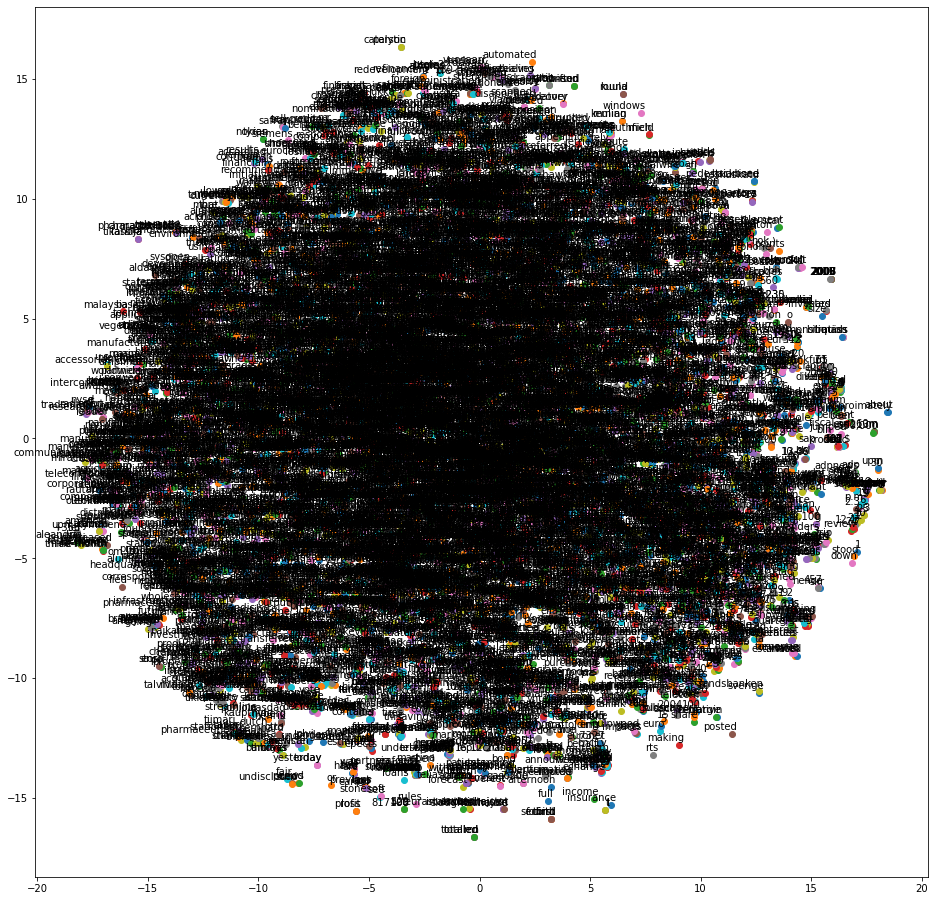

In [122]:
tsne_plot(d2v_model)


In [123]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


model = Sequential()

model.add(Embedding(len(d2v_model.wv.key_to_index)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 20)            205980    
                                                                 
 lstm_2 (LSTM)               (None, 50)                14200     
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 220,333
Trainable params: 220,333
Non-trainable params: 0
_________________________________________________________________


In [124]:
Y = pd.get_dummies(df['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4118, 50) (4118, 3)
(727, 50) (727, 3)


In [125]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)


Epoch 1/50
129/129 - 3s - loss: 0.5483 - acc: 0.5991 - 3s/epoch - 25ms/step
Epoch 2/50
129/129 - 2s - loss: 0.4099 - acc: 0.7120 - 2s/epoch - 14ms/step
Epoch 3/50
129/129 - 2s - loss: 0.2968 - acc: 0.7965 - 2s/epoch - 14ms/step
Epoch 4/50
129/129 - 2s - loss: 0.2186 - acc: 0.8458 - 2s/epoch - 14ms/step
Epoch 5/50
129/129 - 2s - loss: 0.1569 - acc: 0.9058 - 2s/epoch - 14ms/step
Epoch 6/50
129/129 - 2s - loss: 0.0929 - acc: 0.9609 - 2s/epoch - 14ms/step
Epoch 7/50
129/129 - 2s - loss: 0.0587 - acc: 0.9747 - 2s/epoch - 14ms/step
Epoch 8/50
129/129 - 2s - loss: 0.0447 - acc: 0.9828 - 2s/epoch - 14ms/step
Epoch 9/50
129/129 - 2s - loss: 0.0378 - acc: 0.9862 - 2s/epoch - 14ms/step
Epoch 10/50
129/129 - 2s - loss: 0.0334 - acc: 0.9881 - 2s/epoch - 13ms/step
Epoch 11/50
129/129 - 2s - loss: 0.0255 - acc: 0.9903 - 2s/epoch - 13ms/step
Epoch 12/50
129/129 - 2s - loss: 0.0242 - acc: 0.9917 - 2s/epoch - 13ms/step
Epoch 13/50
129/129 - 2s - loss: 0.0197 - acc: 0.9922 - 2s/epoch - 13ms/step
Epoch 14

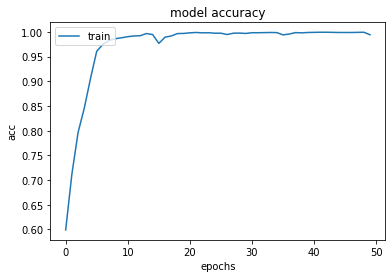

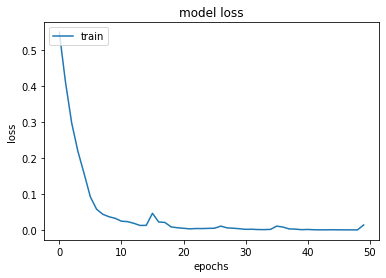

<Figure size 432x288 with 0 Axes>

In [126]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [127]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

129/129 - 1s - loss: 0.0059 - acc: 0.9971 - 961ms/epoch - 7ms/step
23/23 - 0s - loss: 1.0947 - acc: 0.7139 - 143ms/epoch - 6ms/step
Train: 0.997, Test: 0.7139


In [131]:
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
yhat = model.predict(X_test)
yhat_classes=np.argmax(yhat, axis=1)
print(yhat_classes)


[[5.8286549e-03 9.9369991e-01 4.7146482e-04]
 [9.9999988e-01 1.0275212e-07 4.2696588e-08]
 [6.1659892e-05 9.9992025e-01 1.8100714e-05]
 ...
 [9.9972993e-01 2.4436071e-04 2.5769654e-05]
 [1.2007317e-06 9.9999845e-01 3.4701921e-07]
 [9.9999118e-01 6.6346815e-06 2.1340466e-06]]
23/23 [==============================] - 0s 6ms/step
[1 0 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 2 2 1 1 0 0 1 0 1 1 0 0 1 1 1 2 1 1 1
 0 1 1 0 1 2 1 0 1 1 1 0 1 2 1 2 2 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 2 1 1 0 1
 0 1 1 1 1 0 1 2 0 1 0 0 1 0 1 0 0 1 1 2 1 1 0 1 0 1 0 1 1 2 0 1 1 1 2 1 1
 1 2 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 0 0 1 2 2 0 1 1 0 1 1 1 2 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 2 1 0 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 1 0 1 0 2 2 2 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 2 1
 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 2 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 

In [132]:
import numpy as np
rounded_labels=np.argmax(Y_test, axis=1)
rounded_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0,

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
cm

array([[128,  83,   4],
       [ 65, 346,  15],
       [ 15,  26,  45]], dtype=int64)

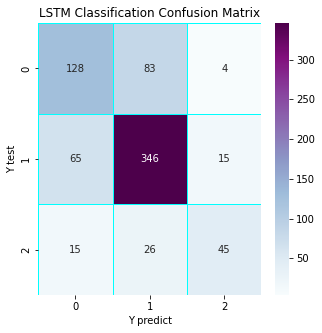

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('LSTM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [135]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

4/4 [==============================] - 0s 7ms/step - loss: 1.1735 - acc: 0.7436
score: 1.17
acc: 0.74


In [136]:
model.save('Mymodel.h5')


In [137]:
message = ['Gold prices rose to its maximum']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 19ms/step
[[9.9997711e-01 5.5028900e-06 1.7394006e-05]] 0


In [145]:
message = ['Sales decreased by 10% and ended lower than ever']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 10ms/step
[[8.6710625e-06 5.0348905e-07 9.9999082e-01]] 2


In [144]:
message = ['Companies net sale doubled and profit margin rose by 98%']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 24ms/step
[[1.000000e+00 4.842633e-09 4.488084e-09]] 0


In [149]:
message = ['Operating profir tottaled EUR 2.1 mn, up from EUR 18.6 mn in 2007']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

pred = model.predict(padded)

labels = ['0','1','2']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 19ms/step
[[9.9999976e-01 1.6199468e-07 1.4896234e-07]] 0
